# Exercises on Fitness Calculations

This exercise needs the Petri net class of pmlab (pn.py).

In [0]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config && pip install pygraphviz;

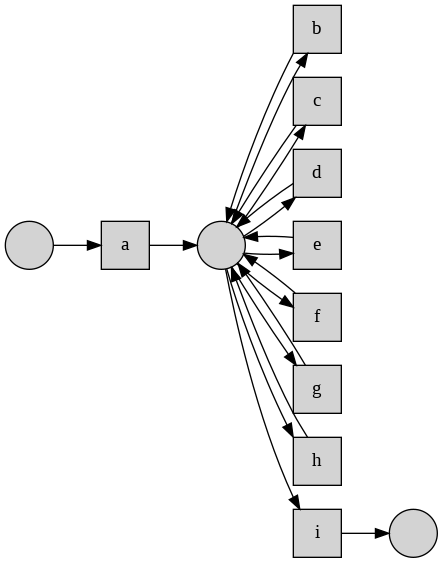

In [2]:
from pn import *

# flower model
flower = PetriNet()

flower.\
  add_place(1).\
  add_place(2).\
  add_transition("a", -2).\
  add_transition("b", -3).\
  add_transition("c", -4).\
  add_transition("d", -5).\
  add_transition("e", -7).\
  add_transition("f", -8).\
  add_transition("g", -9).\
  add_transition("h", -10).\
  add_transition("i", -11).\
  add_place(3)

flower.\
  add_edge(1, -2).\
  add_edge(-2, 2).\
  add_edge(2, -3, True).\
  add_edge(2, -4, True).\
  add_edge(2, -5, True).\
  add_edge(2, -7, True).\
  add_edge(2, -8, True).\
  add_edge(2, -9, True).\
  add_edge(2, -10, True).\
  add_edge(2, -11).\
  add_edge(-11, 3)

#flower.add_marking(1)

draw_petri_net(flower)

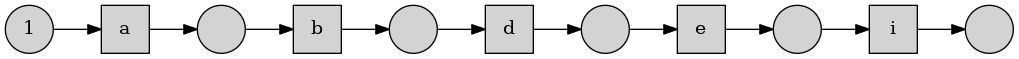

In [4]:
from pn import *

# sequence model
seq = PetriNet()
seq.\
  add_place(1).\
  add_transition("a", -1).\
  add_place(2).\
  add_transition("b", -2).\
  add_place(3).\
  add_transition("d", -3).\
  add_place(4).\
  add_transition("e", -4).\
  add_place(5).\
  add_transition("i", -5).\
  add_place(6)

for x in range(1, 6):
  seq.add_edge(x, -x)
  seq.add_edge(-x, x + 1)

seq.add_marking(1)

draw_petri_net(seq)

In [0]:
# log
log = dict()
log["abdei"] = 1207
log["acdghfi"] = 145
log["acgdhfi"] = 56
log["achdfi"] = 23
log["acdhfi"] = 28

In [5]:
# appropriateness

petri = flower

aB_num = 0
aB_den = 0

for t in log:
  petri.add_marking(1)
  tot_enabled_transitions = 0
  for e in t:
    tot_enabled_transitions += len(petri.all_enabled_transitions())
#    if e in petri.transitions:
    transition = petri.get_mapping()[e][0]
    petri.fire_transition(transition)
  
  avg_enabled_transitions = tot_enabled_transitions / len(t)
  
  aB_num += log[t] * (len(petri.transitions) - avg_enabled_transitions)
  aB_den += log[t]
  
  # reset marking
  for idx, p in petri.places.items():
    petri.marking[idx] = 0

aB = aB_num / ((len(petri.transitions) - 1) * aB_den)
print(aB)

0.29209218642906104
